# Datasets

*   train.csv
    1. row_id
      - รหัสประจำแถว
    2. cfips
      - ตัวระบุเฉพาะสำหรับแต่ละเขต โดยใช้ระบบประมวลผลข้อมูลกลางของรัฐบาลกลาง(Federal Information Processing System)
        * สองหลักแรกตรงกับรหัส FIPS ของรัฐ
        * ส่วน 3 หลักถัดไปแสดงเขต
    3. county_name ชื่อของเขต
    4. state_name ชื่อของรัฐ
    5. first_day_of_month วันแรกของเดือน
    6. microbusiness_density           
       * จำนวนธุรกิจจุลภาคต่อประชากร 100 คนที่มีอายุเกิน 18 ปีในเขตนั้น **"Target Variable"**
    7. active
        * จำนวนธุรกิจจุลภาคทั้งหมดในเขต ไม่มีใน test.csv
*   test.csv
    1. row_id
    2. cfips
    3. first_day_of_month
*   census_starter.csv
    * จากการสำรวจชุมชนอเมริกัน (American Community Survey - ACS) ของสำนักงานสำรวจสำมโนประชากรที่ data.census.gov เปอร์เซ็นต์ฟิลด์คำนวณจากจำนวนดิบที่ ACS ให้ไว้
       1.  **pct_bb_[year]**    
          - เปอร์เซ็นต์ของครัวเรือนในเขตที่มีอินเทอร์เน็ตบรอดแบนด์ทุกประเภท คำนวณจากตาราง ACS B28002: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD
       2. **pct_college_[year]**
          - เปอร์เซ็นต์ของประชากรในเขตที่มีอายุ 25 ปีขึ้นไปที่มีวุฒิการศึกษาปริญญาตรี 4 ปี คำนวณจากตาราง ACS S1501: EDUCATIONAL ATTAINMENT
       3. **pct_foreign_born_[year]**  
          - เปอร์เซ็นต์ของประชากรในเขตที่เกิดนอกสหรัฐอเมริกา คำนวณจากตาราง ACS DP02: SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES
       4. **pct_it_workers_[year]**
          - เปอร์เซ็นต์ของแรงงานในเขตที่ทำงานในอุตสาหกรรมที่เกี่ยวข้องกับข้อมูล คำนวณจากตาราง ACS S2405: INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER
       5. **median_hh_inc_[year]**  
          - รายได้ครัวเรือนเฉลี่ยในเขต คำนวณจากตาราง ACS S1901: INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
*   rervealed_test.csv
*   sample_submission.csv





**1. Data Exploration**



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings

warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/content/train.csv')
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
cs = pd.read_csv('/content/census_starter.csv')

In [7]:
train

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [8]:
test

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01


In [9]:
cs

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [10]:
print(train.shape)
print(test.shape)
print(cs.shape)

(122265, 7)
(25080, 3)
(3142, 26)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25080 entries, 0 to 25079
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              25080 non-null  object
 1   cfips               25080 non-null  int64 
 2   first_day_of_month  25080 non-null  object
dtypes: int64(1), object(2)
memory usage: 587.9+ KB


In [13]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [17]:
print(train.isnull().sum())
print("=======================================")
print(test.isnull().sum())
print("=======================================")
print(cs.isnull().sum())

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64
row_id                0
cfips                 0
first_day_of_month    0
dtype: int64
pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              1
pct_bb_2021              1
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         1
pct_college_2021         1
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    1
pct_foreign_born_2021    1
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      1
pct_it_workers_2021      1
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       2
median_hh_inc_2021       2
dtype: int6

In [7]:
df['microbusiness_density'] = df['microbusiness_density'].astype('int64')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   row_id                 122265 non-null  object
 1   cfips                  122265 non-null  int64 
 2   county                 122265 non-null  object
 3   state                  122265 non-null  object
 4   first_day_of_month     122265 non-null  object
 5   microbusiness_density  122265 non-null  int64 
 6   active                 122265 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 6.5+ MB
None


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1,100


In [10]:
cat_col = [fea
           for fea in df.columns
              if df[fea].dtype == 'int64']
num_col = [fea
           for fea in df.columns
              if df[fea].dtype != 'int64']

In [13]:
df[cat_col]

,cfips,microbusiness_density,active
0,1001,3,1249
1,1001,2,1198
2,1001,3,1269
3,1001,2,1243
4,1001,2,1243
...,...,...,...
122260,56045,1,101
122261,56045,1,101
122262,56045,1,100
122263,56045,1,100


In [44]:
df[num_col].head(50)

,row_id,county,state,first_day_of_month
0,1001_2019-08-01,Autauga County,Alabama,2019-08-01
1,1001_2019-09-01,Autauga County,Alabama,2019-09-01
2,1001_2019-10-01,Autauga County,Alabama,2019-10-01
3,1001_2019-11-01,Autauga County,Alabama,2019-11-01
4,1001_2019-12-01,Autauga County,Alabama,2019-12-01
5,1001_2020-01-01,Autauga County,Alabama,2020-01-01
6,1001_2020-02-01,Autauga County,Alabama,2020-02-01
7,1001_2020-03-01,Autauga County,Alabama,2020-03-01
8,1001_2020-04-01,Autauga County,Alabama,2020-04-01
9,1001_2020-05-01,Autauga County,Alabama,2020-05-01


In [41]:
df['cfips'].value_counts()

1001     39
39133    39
39089    39
39091    39
39093    39
         ..
21113    39
21115    39
21117    39
21119    39
56045    39
Name: cfips, Length: 3135, dtype: int64

**EDA**

In [15]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=aeee4c7bf3905a2fc2aea1248680ea0a7873472ef79b867dba55a59bc54b4278
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(train, title='MicroBusiness-EDA', explorative=True)
profile.to_file("Micro_Business_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

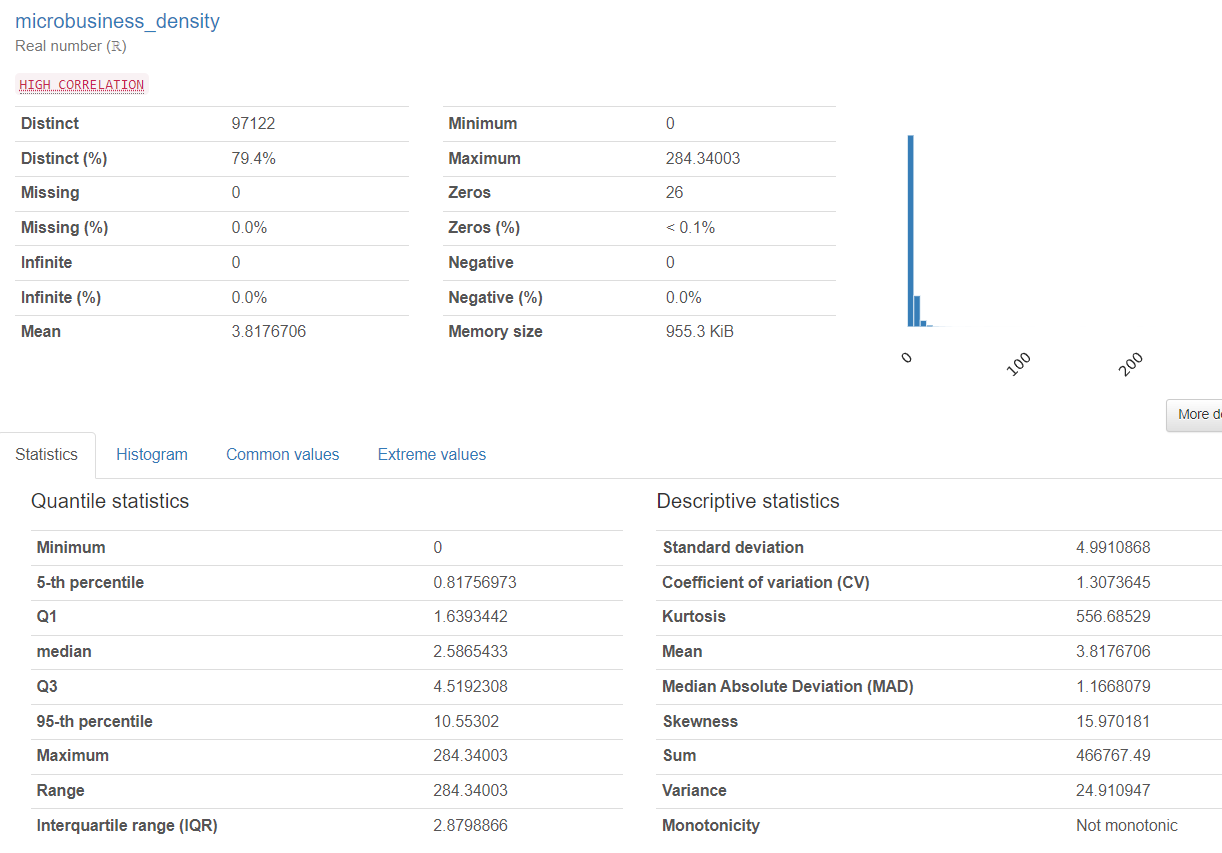

<Figure size 1000x500 with 0 Axes>

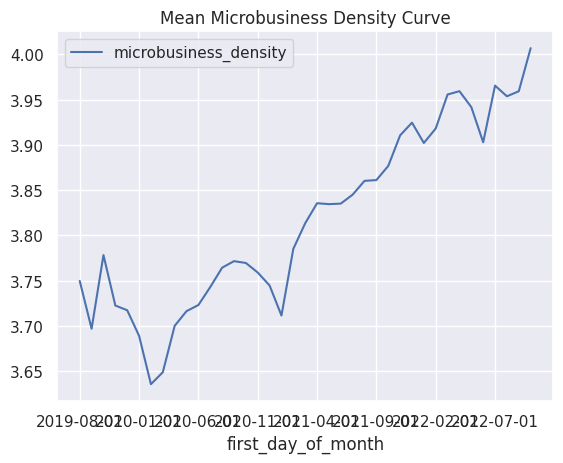

   first_day_of_month  microbusiness_density
0          2019-08-01               3.749621
1          2019-09-01               3.696846
2          2019-10-01               3.778263
3          2019-11-01               3.722510
4          2019-12-01               3.717284
5          2020-01-01               3.689041
6          2020-02-01               3.635546
7          2020-03-01               3.648742
8          2020-04-01               3.700048
9          2020-05-01               3.716288
10         2020-06-01               3.723051
11         2020-07-01               3.742934
12         2020-08-01               3.764328
13         2020-09-01               3.771558
14         2020-10-01               3.769525
15         2020-11-01               3.758974
16         2020-12-01               3.744650
17         2021-01-01               3.711420
18         2021-02-01               3.785175
19         2021-03-01               3.813435
20         2021-04-01               3.835583
21        

In [16]:
# Mean Microbusiness Density of all counties
plt.figure(figsize=(10, 5))
train.groupby('first_day_of_month')['microbusiness_density'].mean()\
              .reset_index().plot(x = 'first_day_of_month', y = 'microbusiness_density', kind = 'line'\
              , title = 'Mean Microbusiness Density Curve')
plt.show()

print(train.groupby('first_day_of_month')['microbusiness_density'].mean().reset_index())


# กราฟที่ถูกพล็อตในแกน x ในแต่ละช่องนั้นจะถูกพล็อตทุก ๆ 5 เดือน โดยเริ่มตั้งแต่
# เริ่มจาก 2019-08-01, 2020-01-01, ... , 2022-07-01

# 1 : ช่วงที่มีค่า microbusiness_density น้อยที่สุด คือ ช่วง 2020-02-01 ถึง 2020-03-01
#     จากนั้น ช่วง 2021-01-01 มีค่า microbusiness_density เพิ่มขึ้นอย่างต่อเนื่อง

In [18]:
# Data Preparation

#
cs_bb = pd.DataFrame(cs[['cfips','pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021']])
cs_bb.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_bb = pd.melt(cs_bb, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_bb.columns=['cfips','year','pct_bb']
cs_bb['year'] = cs_bb['year'].astype(int)

cs_bb

,cfips,year,pct_bb
0,1001,2017,76.6
1,1003,2017,74.5
2,1005,2017,57.2
3,1007,2017,62.0
4,1009,2017,65.8
...,...,...,...
15705,56037,2021,88.4
15706,56039,2021,90.5
15707,56041,2021,90.6
15708,56043,2021,85.4


In [19]:
cs_college = pd.DataFrame(cs[['cfips','pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021']])
cs_college.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_college = pd.melt(cs_college, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_college.columns = ['cfips','year','pct_college']
cs_college['year'] = cs_college['year'].astype(int)

cs_college

,cfips,year,pct_college
0,1001,2017,14.5
1,1003,2017,20.4
2,1005,2017,7.6
3,1007,2017,8.1
4,1009,2017,8.7
...,...,...,...
15705,56037,2021,12.4
15706,56039,2021,38.3
15707,56041,2021,12.3
15708,56043,2021,17.2


In [35]:
cs_foreign_born = pd.DataFrame(cs[['cfips','pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021']])
cs_foreign_born.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_foreign_born = pd.melt(cs_foreign_born, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_foreign_born.columns = ['cfips','year','pct_foreign_born']
cs_foreign_born['year'] = cs_foreign_born['year'].astype(int)

cs_foreign_born

,cfips,year,pct_foreign_born
0,1001,2017,2.1
1,1003,2017,3.2
2,1005,2017,2.7
3,1007,2017,1.0
4,1009,2017,4.5
...,...,...,...
15705,56037,2021,5.5
15706,56039,2021,11.1
15707,56041,2021,2.9
15708,56043,2021,1.0


In [20]:
cs_it_workers = pd.DataFrame(cs[['cfips','pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021']])
cs_it_workers.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_it_workers = pd.melt(cs_it_workers, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_it_workers.columns = ['cfips','year','pct_it_workers']
cs_it_workers['year'] = cs_it_workers['year'].astype(int)

cs_it_workers

,cfips,year,pct_it_workers
0,1001,2017,1.3
1,1003,2017,1.4
2,1005,2017,0.5
3,1007,2017,1.2
4,1009,2017,1.3
...,...,...,...
15705,56037,2021,1.0
15706,56039,2021,2.0
15707,56041,2021,0.9
15708,56043,2021,1.1


In [21]:
cs_median_hh_inc = pd.DataFrame(cs[['cfips','median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']])
cs_median_hh_inc.columns = ['cfips','2017', '2018', '2019', '2020', '2021']
cs_median_hh_inc = pd.melt(cs_median_hh_inc, id_vars='cfips', value_vars=['2017','2018','2019','2020','2021'])
cs_median_hh_inc.columns = ['cfips','year','pct_median_hh_inc']
cs_median_hh_inc['year'] = cs_median_hh_inc['year'].astype(int)

cs_median_hh_inc

,cfips,year,pct_median_hh_inc
0,1001,2017,55317.0
1,1003,2017,52562.0
2,1005,2017,33368.0
3,1007,2017,43404.0
4,1009,2017,47412.0
...,...,...,...
15705,56037,2021,76668.0
15706,56039,2021,94498.0
15707,56041,2021,75106.0
15708,56043,2021,62271.0


In [26]:
df.cfips.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
122260    False
122261    False
122262    False
122263    False
122264    False
Name: cfips, Length: 122265, dtype: bool

In [27]:
df[df.cfips.isna()].head(5)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active


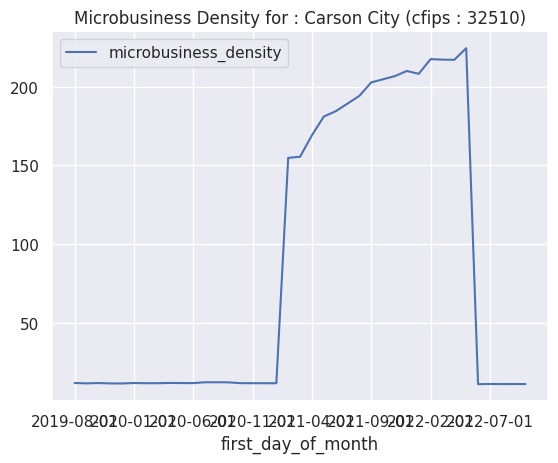

In [30]:
#Change value of cfips to get graph for different county
cfips = 32510
county = train[train['cfips'] == cfips]['county'].unique()[0]

# เปลี่ยนเลขเพื่อเป็นรหัสของ Carson city
# Microbusiness Density for particular county
plot_01 =  train[train['cfips'] == cfips].groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plot_01.plot(kind = 'line',
              x='first_day_of_month',
              y='microbusiness_density',
              title ='Microbusiness Density for : {} (cfips : {})'.format(county, cfips))

import plotly.express as px

fig = px.line(plot_01, x = 'first_day_of_month',
              y = 'microbusiness_density',
              title = 'Microbusiness Density for : {} (cfips : {})'.format(county, cfips))
fig.show()

In [31]:
print(train.columns)

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')


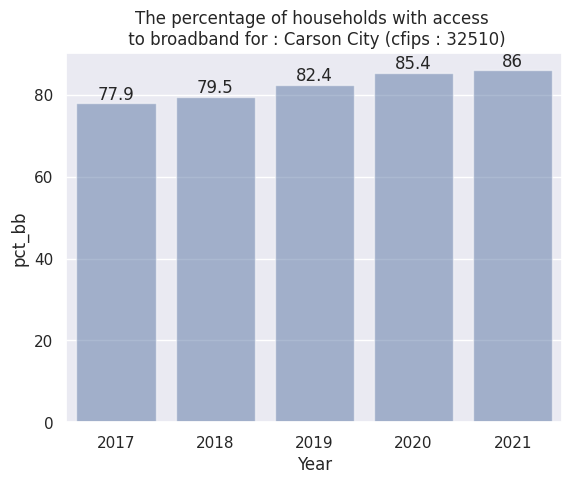

In [32]:
#The percentage of households with access to broadband

plot_02 = cs_bb[cs_bb['cfips'] == cfips].groupby('year')['pct_bb'].mean().reset_index()
plot_02 = sns.barplot(x = plot_02['year'], y=plot_02['pct_bb'], alpha=0.5)
plot_02.bar_label(plot_02.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_bb')
plt.title('The percentage of households with access \n to broadband for : {} (cfips : {})'.format(county, cfips));

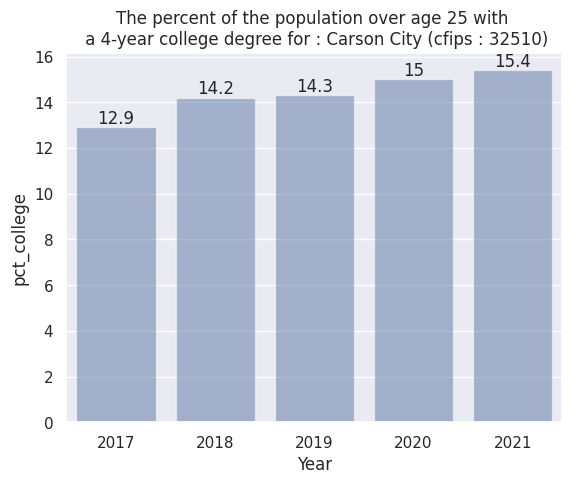

In [33]:
#The percent of the population over age 25 with a 4-year college degree

plot_03 = cs_college[cs_college['cfips'] == cfips].groupby('year')['pct_college'].mean().reset_index()
plot_03 = sns.barplot(x = plot_03['year'], y=plot_03['pct_college'], alpha=0.5)
plot_03.bar_label(plot_03.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_college')
plt.title('The percent of the population over age 25 with \n a 4-year college degree for : {} (cfips : {})'.format(county, cfips));

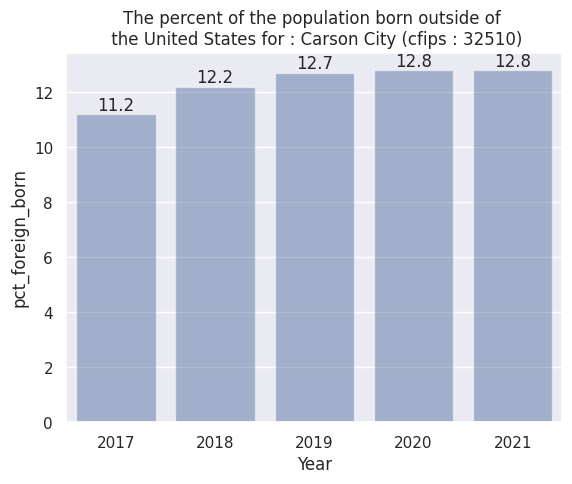

In [36]:
#The percent of the population born outside of the United States

plot_04 = cs_foreign_born[cs_foreign_born['cfips'] == cfips].groupby('year')['pct_foreign_born'].mean().reset_index()
plot_04 = sns.barplot(x = plot_04['year'], y=plot_04['pct_foreign_born'], alpha=0.5)
plot_04.bar_label(plot_04.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_foreign_born')
plt.title('The percent of the population born outside of \n the United States for : {} (cfips : {})'.format(county, cfips));

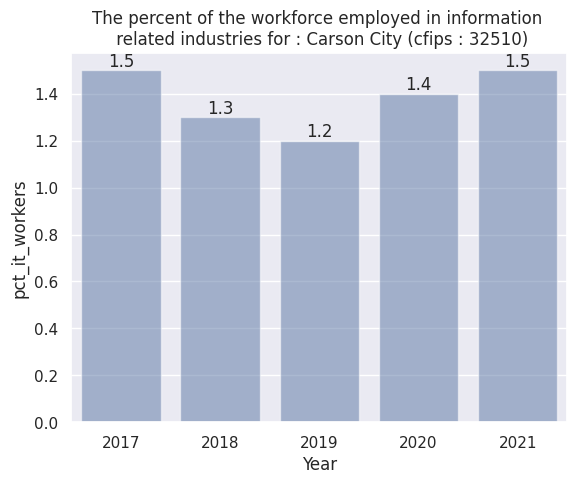

In [37]:
#The percent of the workforce employed in information related industries

plot_05 = cs_it_workers[cs_it_workers['cfips'] == cfips].groupby('year')['pct_it_workers'].mean().reset_index()
plot_05 = sns.barplot(x = plot_05['year'], y=plot_05['pct_it_workers'], alpha=0.5)
plot_05.bar_label(plot_05.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_it_workers')
plt.title('The percent of the workforce employed in information \n related industries for : {} (cfips : {})'.format(county, cfips));

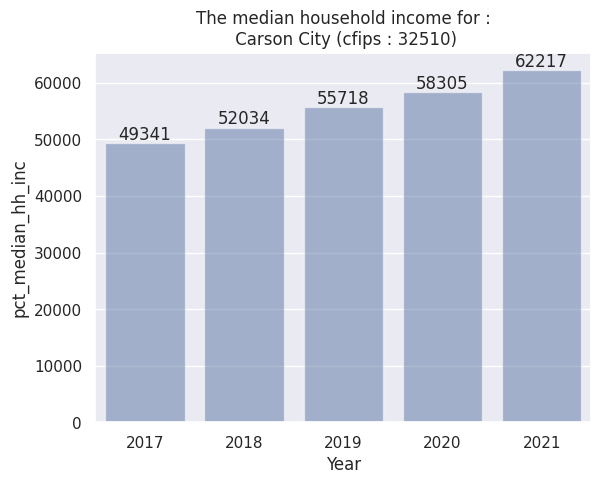

In [38]:
#The median household income

plot_06 = cs_median_hh_inc[cs_median_hh_inc['cfips'] == cfips].groupby('year')['pct_median_hh_inc'].mean().reset_index()
plot_06 = sns.barplot(x = plot_06['year'], y=plot_06['pct_median_hh_inc'], alpha=0.5)
plot_06.bar_label(plot_06.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_median_hh_inc')
plt.title('The median household income for :\n {} (cfips : {})'.format(county, cfips));

Text(0.5, 1.0, 'Correlation Heatmap')

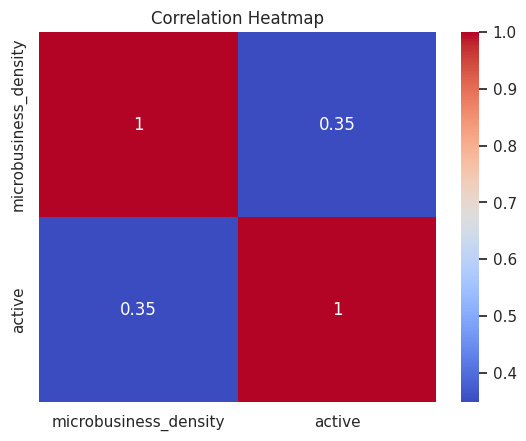

In [39]:
# Correlation Heatmap

corr_df = train.groupby('cfips')[['microbusiness_density', 'active']].mean().reset_index()
sns.heatmap(corr_df.drop('cfips', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

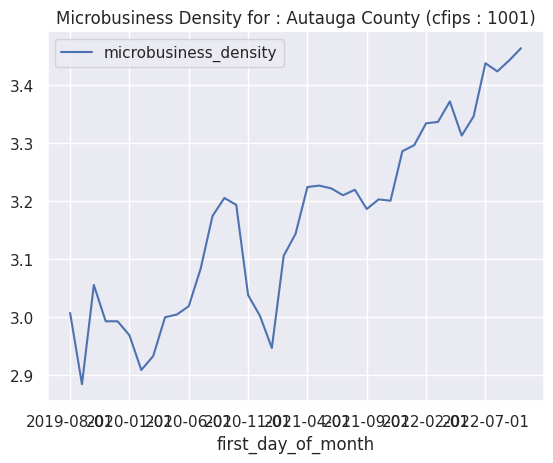

In [45]:
#Change value of cfips to get graph for different county
cfips = 1001
county = train[train['cfips'] == cfips]['county'].unique()[0]

# เปลี่ยนเลขเพื่อเป็นรหัสของ Carson city
# Microbusiness Density for particular county
plot_01 =  train[train['cfips'] == cfips].groupby('first_day_of_month')['microbusiness_density'].mean().reset_index()
plot_01.plot(kind = 'line',
              x='first_day_of_month',
              y='microbusiness_density',
              title ='Microbusiness Density for : {} (cfips : {})'.format(county, cfips))

import plotly.express as px

fig = px.line(plot_01, x = 'first_day_of_month',
              y = 'microbusiness_density',
              title = 'Microbusiness Density for : {} (cfips : {})'.format(county, cfips))
fig.show()

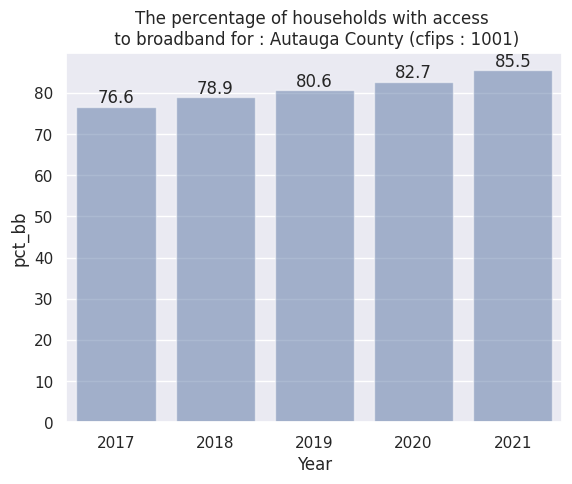

In [46]:
#The percentage of households with access to broadband

plot_02 = cs_bb[cs_bb['cfips'] == cfips].groupby('year')['pct_bb'].mean().reset_index()
plot_02 = sns.barplot(x = plot_02['year'], y=plot_02['pct_bb'], alpha=0.5)
plot_02.bar_label(plot_02.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_bb')
plt.title('The percentage of households with access \n to broadband for : {} (cfips : {})'.format(county, cfips));

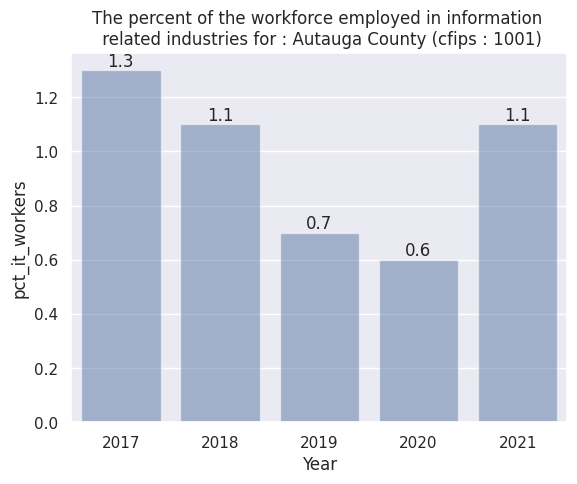

In [47]:
#The percent of the workforce employed in information related industries

plot_05 = cs_it_workers[cs_it_workers['cfips'] == cfips].groupby('year')['pct_it_workers'].mean().reset_index()
plot_05 = sns.barplot(x = plot_05['year'], y=plot_05['pct_it_workers'], alpha=0.5)
plot_05.bar_label(plot_05.containers[0]);
plt.xlabel('Year')
plt.ylabel('pct_it_workers')
plt.title('The percent of the workforce employed in information \n related industries for : {} (cfips : {})'.format(county, cfips));